In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (15, 10)

In [4]:
scaler = StandardScaler() 
housing = fetch_california_housing() 

## Building a Regression MLP Using the Sequential API - Géron (2019)

We follow example 2 in this repository to build our first MLP model for a regression task.

We consider the task of predicting the ln(median house value), named "MedHouseVal", using the numerical features at our disposal. Below you will find some summary statistics of the dataset.

In [5]:
y = pd.DataFrame(housing['target'], columns=housing['target_names'])
X = pd.DataFrame(housing['data'], columns=housing['feature_names'])
data = pd.concat([y, X], axis=1)

data.head()

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
data.describe()

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

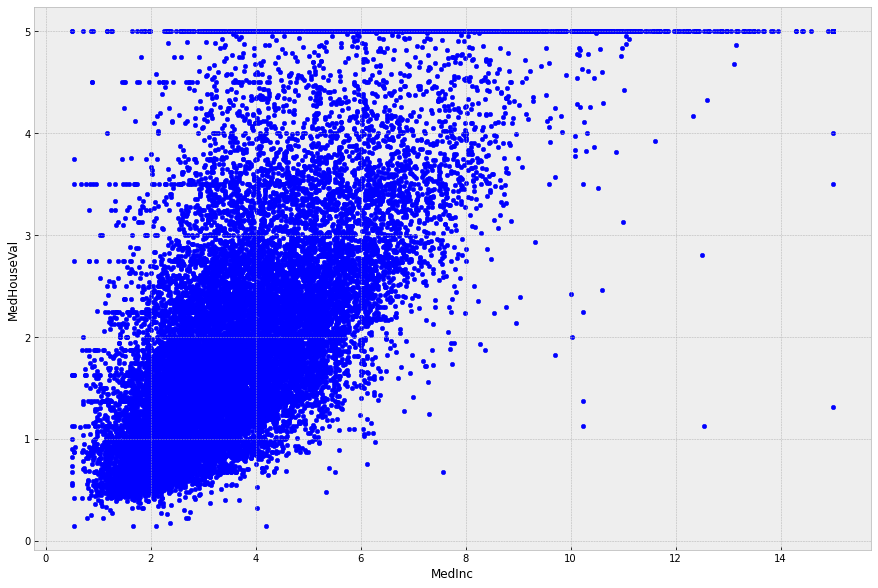

In [47]:
data.plot.scatter(y='MedHouseVal', x='MedInc')

### Data preprocessing 

The dataset is all composed of numerical fetures and there is no missing value on the dataset. To make it easier for the optimization algorithm to converge to the global minimum of the loss function, we use the "StandardScaler" function on the dataset in order to take the zscore score of the vairbles.

More specifically, the "StandardScaler" function computes the mean and standard deviation of the considered dataset (i.e. "X_train") and stores it to later apply on further datasets (i.e. "X_valid" and/or "X_test").

In [47]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full) 

X_train_scaled = scaler.fit_transform(X_train) 
X_valid_scaled = scaler.transform(X_valid) 
X_test_scaled = scaler.transform(X_test)

In [48]:
pd.DataFrame(X_train).mean()

0       3.864230
1      28.704823
2       5.438113
3       1.099788
4    1429.323170
5       2.956181
6      35.623146
7    -119.562245
dtype: float64

In [49]:
pd.DataFrame(X_train).std()

0       1.915000
1      12.636552
2       2.768773
3       0.547074
4    1155.552234
5       1.396987
6       2.133778
7       2.004276
dtype: float64

In [50]:
(X_valid[:,0] - pd.DataFrame(X_train).mean()[0]) / pd.DataFrame(X_train).std()[0]

array([-0.36899728,  0.4066164 ,  0.91491934, ..., -0.87808351,
       -1.07750913, -0.81844904])

In [51]:
X_valid_scaled[:,0]

array([-0.36901317,  0.40663391,  0.91495875, ..., -0.87812133,
       -1.07755553, -0.81848429])

### Model setup

Once again we will use the keras "Sequential" function to build our feed forward neural network model. 

One easier choice we would make is to have only one hidden unit in the output layer. This is the case because we want to forecast one continuous vairable. Furthermore, since our target variable is continuos, we need a loss function which enables the comparison of continuous values. The most common choice is the "mean_squared_error". The other hyperparemeters of the model could be changed in order to make a better model.

In [39]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1) 
    ]
)

model.compile(loss="mean_squared_error",
              optimizer="sgd") 
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) 

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 52us/sample - loss: 1.4552 - val_loss: 0.5443
Epoch 2/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4553 - val_loss: 0.4381
Epoch 3/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4085 - val_loss: 0.4156
Epoch 4/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3920 - val_loss: 0.4108
Epoch 5/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3831 - val_loss: 0.3893
Epoch 6/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3782 - val_loss: 0.3778
Epoch 7/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3723 - val_loss: 0.3860
Epoch 8/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3680 - val_loss: 0.3733
Epoch 9/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3662 - val_l

In [40]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [44]:
y_pred

array([[1.3534782],
       [1.9248536],
       [1.4361196]], dtype=float32)

In [46]:
y_test[:3]

array([1.285, 1.335, 1.286])